In [46]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from utils.audio_preprocess import *
import soundfile as sf

Here's an explanation of the different terms used in Librosa for audio processing:

Time: time refers to the duration of the audio signal in seconds. When you load an audio file using Librosa, you can specify the sample rate (sr) to obtain the audio signal in seconds. For example, if the sample rate is 44100 Hz, then one second of audio corresponds to 44100 samples.

Sample: a sample is a single value in the audio signal that represents the amplitude of the sound wave at a specific point in time. The sample rate (sr) determines the number of samples per second, and thus the time resolution of the audio signal. For example, if the sample rate is 44100 Hz, then there are 44100 samples per second.

Frame: a frame is a collection of consecutive samples. In Librosa, frames are often used to analyze the spectral content of an audio signal over time. The length of a frame is determined by the frame_length parameter, which is usually specified in samples or seconds. The hop_length parameter determines the number of samples between consecutive frames, which determines the time resolution of the spectral analysis.

In summary, time refers to the duration of the audio signal in seconds, samples are the individual amplitude values of the signal at specific points in time, and frames are collections of consecutive samples used for analyzing the spectral content of the audio signal over time.

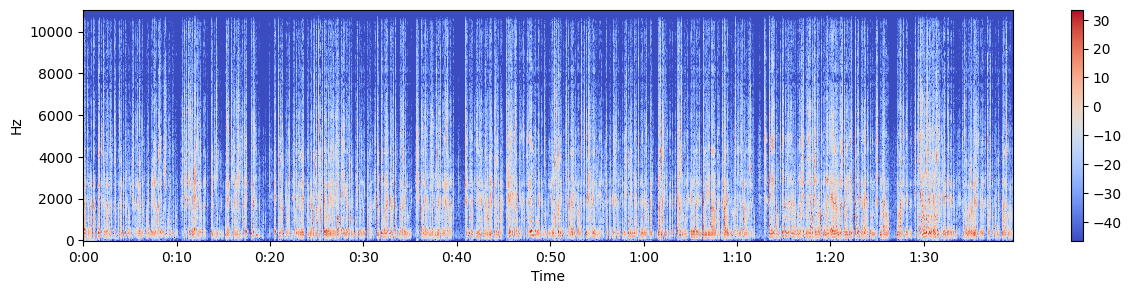

In [35]:
x, srx = librosa.load('Data/Io e Annie/Originale.wav', mono=True)
#x = librosa.util.normalize(x)
# Spectrogram of frequency
X = librosa.stft(x, n_fft=512)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=srx, x_axis='time', y_axis='hz', n_fft=512, hop_length = 512/4)
plt.colorbar()

In [48]:
#sf.write('processed_audio1.wav', y, sry)


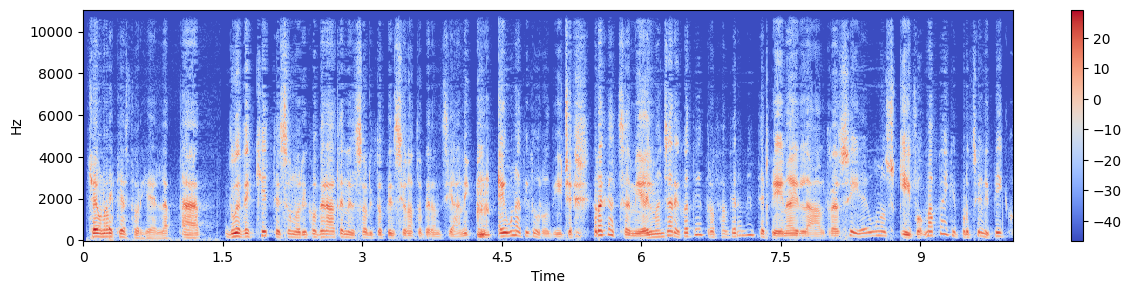

In [36]:
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb[:,0:uAudio_to_uSpect(second_to_unit(10))], sr=srx, x_axis='time', y_axis='hz', n_fft=512, hop_length = 512/4)
plt.colorbar()

In [39]:
X_speechSections = audio_section(Xdb, window = 0.5, threshold = -39)
X_speechSections

[(0, 10.0),
 (10.5, 17.5),
 (18.0, 19.0),
 (20.5, 35.0),
 (35.5, 39.5),
 (41.0, 61.0),
 (61.5, 72.0),
 (72.5, 86.5),
 (87.0, 100.0)]

In [ ]:
[(0, 10.0),
 (10.5, 17.5),
 (18.0, 19.0),
 (20.5, 35.0),
 (35.5, 40.0),
 (41.0, 61.0),
 (61.5, 72.0),
 (72.5, 86.5),
 (87.0, 100.0)]

In [6]:
Xdb_mean = np.mean(Xdb, axis=0)

# Define the size of the windows --- (srx / 512 // 4) is a second
n = round((srx / (512 // 4))*0.75)

arr = np.pad(Xdb_mean, (0, n - len(Xdb_mean) % n), mode='constant')

# Compute the mean of every n elements and shrink the array length
mean_arr = np.mean(arr[:len(arr)//n*n].reshape(-1, n), axis=1)

# Print the resulting array
print(mean_arr)

[-34.00879  -37.313538 -31.041815 -30.453398 -33.59246  -34.014942
 -34.4247   -29.738424 -31.978943 -38.16644  -27.686508 -33.093227
 -36.65521  -42.731606 -29.681274 -26.193584 -31.050688 -40.16835
 -35.128475 -38.45703  -33.12467  -31.663963 -29.649529 -37.928276
 -28.156492 -42.113003 -44.802765 -37.984978 -33.28491  -37.480034
 -29.995007 -35.96621  -32.65596  -27.100573 -29.762068 -27.76828
 -29.177935 -31.312716 -36.07855  -33.969074 -36.127037 -37.18068
 -30.979414 -28.814608 -30.825377 -30.831459 -37.699512 -36.879597
 -31.935312 -29.795425 -30.419146 -30.354197 -34.823536 -45.154564
 -37.483566 -32.10112  -27.05887  -29.796309 -30.37866  -30.268162
 -34.67359  -24.834166 -34.99798  -31.433212 -31.034176 -36.5433
 -37.520187 -27.391336 -30.314114 -31.316568 -34.336422 -32.762386
 -26.33156  -34.294914 -39.320835 -35.230698 -36.138367 -34.20795
 -31.66994  -34.38952  -30.933529 -40.055763 -27.206322 -35.066452
 -39.561    -25.0527   -36.528915 -30.531492 -32.593174 -29.723719
 

Every frame unit of this array is representative of 0.5 seconds.

In [4]:
#Xdb_mean = np.mean(Xdb, axis=0)
Xdb_mean = mean_arr
threshold = -40
start_time = 0
end_time = 0.5

speech_sections = []
for i in range(Xdb_mean.shape[0]): #each i is 0.5 seconds
    if Xdb_mean[i] > threshold:
        # Add the start ad end time of the low energy section to the list
        speech_sections.append((start_time, end_time))
    start_time += 0.5
    end_time += 0.5

In [13]:
# Extract the non-speech segments from the audio file
audio_sections = np.empty(0, dtype=np.float32)

for segment in unify_intervals(speech_sections):
    start_time = second_to_unit(segment[0])
    end_time = second_to_unit(segment[1])
    audio_sections = np.append(audio_sections, x[start_time:end_time])

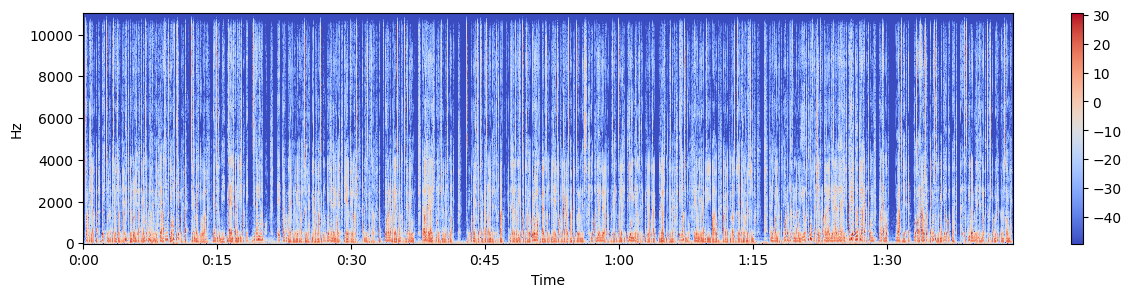

In [31]:
y, sry = librosa.load('Data/Io e Annie/Robi.wav')
#y = librosa.util.normalize(y)
# Spectrogram of frequency
Y = librosa.stft(y, n_fft = 512)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Ydb, sr=sry, x_axis='time', y_axis='hz', n_fft=512, hop_length = 512/4)
plt.colorbar()

In [42]:
Y_speechSections = audio_section(Ydb, window = 0.5, threshold = -42)
Y_speechSections

[(0, 18.5),
 (19.0, 20.5),
 (21.0, 37.0),
 (37.5, 41.5),
 (42.0, 42.5),
 (43.0, 64.0),
 (64.5, 90.5),
 (91.0, 98.0),
 (98.5, 104.5)]

In general, the values of MFCC coefficients reflect the distribution of energy across different frequency bands of the signal, weighted by the sensitivity of the human auditory system to those bands. They are therefore a useful representation for speech and audio signals in which different frequency bands may be more or less important for human perception.

C0 (the 0th coefficient) represents the average magnitude of the signal, which is equivalent to the overall volume or energy of the signal.

C1 (the 1st coefficient) represents the shape of the spectrum at the lowest frequency range and is sensitive to the overall spectral tilt of the signal.

C2 (the 2nd coefficient) represents the shape of the spectrum at the mid-low frequency range and is sensitive to the formant structure of the signal, which is related to the characteristics of the vocal tract.

C3 (the 3rd coefficient) represents the shape of the spectrum at the mid-high frequency range and is sensitive to the harmonic structure of the signal.

C4 (the 4th coefficient) represents the shape of the spectrum at the highest frequency range and is sensitive to the presence of high-frequency noise.

C5 through C12 (the 5th through 12th coefficients) are related to the frequency modulation characteristics of the signal and capture information about the rate of change of the spectrum over time. These coefficients are often used to capture information about the prosody or intonation of speech signals.

In [24]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=x, sr=srx, n_mfcc=13, n_fft = 512)

# Calculate the mean and standard deviation of each MFCC coefficient across time
mfccs_mean = np.mean(mfccs, axis=1)
mfccs_std = np.std(mfccs, axis=1)

print(mfccs_mean)
print(mfccs_std) # more important

[-456.92395     88.26962    -29.536322    27.328474     2.659686
    2.8180943  -14.909789   -16.093714   -15.048384   -17.535095
  -15.624522   -15.055189   -10.603465 ]
[116.91865   47.241318  23.872696  23.017673  19.02261   13.600753
  16.16941   11.965185  13.927849  14.188651  11.5259    10.464489
  11.198709]


In [26]:
mfccs.shape

(13, 4288)

In [27]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sry, n_mfcc=13)

# Calculate the mean and standard deviation of each MFCC coefficient across time
mfccs_mean = np.mean(mfccs, axis=1)
mfccs_std = np.std(mfccs, axis=1)

print(mfccs_mean)
print(mfccs_std)

[-3.9591562e+02  9.9556374e+01  9.0642948e+00  3.2127426e+01
  1.7410086e+01  3.9422605e+00  6.3808331e+00  3.4877801e-01
 -9.1536417e+00  7.3996268e-02 -7.6311073e+00  9.3520393e+00
  1.2875136e+00]
[105.730225  58.637203  30.915102  27.846563  19.417269  17.880812
  13.362542  12.197391  13.205284  11.124844  13.414576   9.495217
   8.262494]


Zero crossing rate: 275337


Text(0.5, 1.0, 'Original')

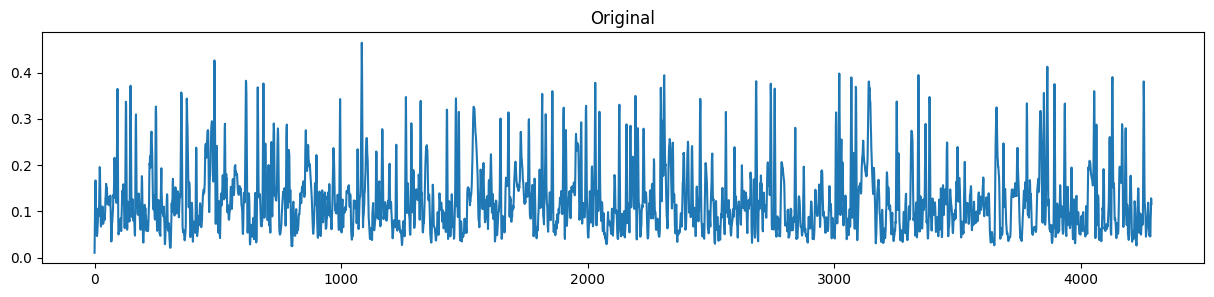

In [35]:
zcrs = librosa.feature.zero_crossing_rate(x)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(x))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('Original')

Zero crossing rate: 196640


Text(0.5, 1.0, 'Robi')

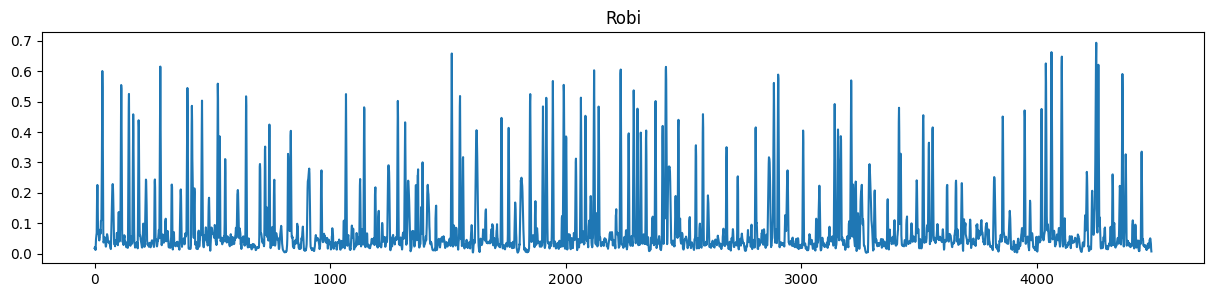

In [36]:
zcrs = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('Robi')